# Banglore House Price Prediction Dataset

In [213]:
#import basic libraries
import numpy as np
import pandas as pd

In [214]:
#reading and understanding the data
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [215]:
#checking the shape of the data
df.shape

(13320, 9)

In [216]:
#checking the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [217]:
#description about the data
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [218]:
#dropping the unimportant features
df.drop(['area_type','society','availability'],axis = 'columns',inplace=True)
df.head()


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [219]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [220]:
#dropping the null values
df.dropna(inplace=True)

In [221]:
#checking the head again 
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [222]:
#feature engineering the size column to make it Bhk column
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [223]:
#now dropping the size column
df.drop('size',axis=1,inplace=True)
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


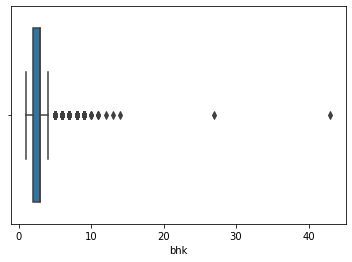

In [224]:
#checking for the outliers in bhk column
import seaborn as sb
sb.boxplot(df.bhk)


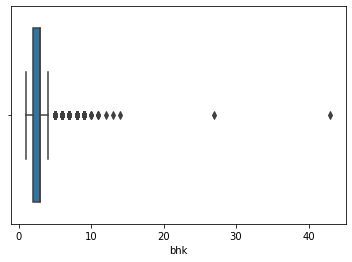

In [225]:
sb.boxplot(df.bhk)


In [226]:
#removing the outliers
df=df[df.bhk<9]

In [227]:
#checking the counts of the location columns
loc= df.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc

location
Whitefield                              514
Sarjapur  Road                          372
Electronic City                         300
Kanakpura Road                          261
Thanisandra                             231
                                       ... 
Kengeri Satellite Town KHB Apartment      1
Kengeri Satellite Town ( BDA SITE)        1
Kenchanehalli R R Nagar                   1
Keerthi Layout                            1
 Anekal                                   1
Name: location, Length: 1257, dtype: int64

In [228]:
#removing the most of the values which have a count below 70
a=(loc[loc>70])

In [229]:
a

location
Whitefield                  514
Sarjapur  Road              372
Electronic City             300
Kanakpura Road              261
Thanisandra                 231
Yelahanka                   206
Uttarahalli                 186
Hebbal                      173
Raja Rajeshwari Nagar       167
Marathahalli                164
7th Phase JP Nagar          147
Bannerghatta Road           144
Hennur Road                 142
Haralur Road                135
Electronic City Phase II    130
Rajaji Nagar                 99
Chandapura                   98
Bellandur                    91
Hoodi                        86
Electronics City Phase 1     86
KR Puram                     84
Begur Road                   83
Sarjapur                     81
Yeshwanthpur                 78
Kasavanhalli                 77
Harlur                       76
Banashankari                 73
Hosa Road                    72
Hormavu                      71
Ramamurthy Nagar             71
Kengeri                      71

In [230]:
df.location=df.location.apply(lambda x: 'Other' if(x not in a) else x)

In [231]:
df.location.value_counts()

Other                       8096
Whitefield                   514
Sarjapur  Road               372
Electronic City              300
Kanakpura Road               261
Thanisandra                  231
Yelahanka                    206
Uttarahalli                  186
Hebbal                       173
Raja Rajeshwari Nagar        167
Marathahalli                 164
7th Phase JP Nagar           147
Bannerghatta Road            144
Hennur Road                  142
Haralur Road                 135
Electronic City Phase II     130
Rajaji Nagar                  99
Chandapura                    98
Bellandur                     91
Hoodi                         86
Electronics City Phase 1      86
KR Puram                      84
Begur Road                    83
Sarjapur                      81
Yeshwanthpur                  78
Kasavanhalli                  77
Harlur                        76
Banashankari                  73
Hosa Road                     72
Hormavu                       71
Ramamurthy

In [232]:
#looking for the head 
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Other,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Other,1521,3.0,1.0,95.00,3
4,Other,1200,2.0,1.0,51.00,2


In [233]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [234]:

df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Other,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Other,3090 - 5002,4.0,0.0,445.000,4
772,Other,1160 - 1195,2.0,0.0,59.935,2


In [235]:
#converting total_sqft column to numeric
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12665 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12665 non-null  object 
 1   total_sqft  12624 non-null  float64
 2   bath        12665 non-null  float64
 3   balcony     12665 non-null  float64
 4   price       12665 non-null  float64
 5   bhk         12665 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 692.6+ KB


In [237]:
#checking the shape again
df.shape

(12665, 6)

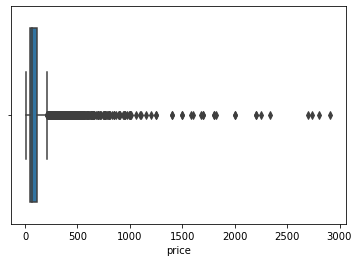

In [238]:
#checking for the outliers in the price column
sb.boxplot(df.price)

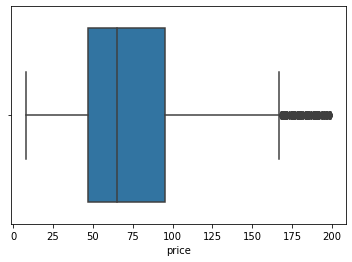

In [239]:
#removing the outliers in the price column
df=df[df.price<200]
sb.boxplot(df.price)

In [240]:
df.shape

(11370, 6)

In [241]:
#there are some null values appear while converting total_sqft to numeric 
df.isnull().sum()

location       0
total_sqft    32
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [242]:
#so removing the null values
df.dropna(inplace=True)

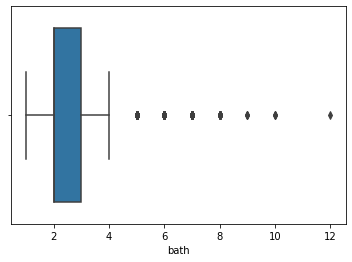

In [243]:
#checking for the outliers in the bath column
sb.boxplot(df.bath)

In [244]:
#removing the outliers
df=df[df.bath<5]

In [245]:
#checking for the head of the dataset
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Other,1521.0,3.0,1.0,95.00,3
4,Other,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2


In [246]:
#performing one hat encoding to the location column
c=pd.get_dummies(df.location)
c

,7th Phase JP Nagar,Banashankari,Bannerghatta Road,Begur Road,Bellandur,Chandapura,Electronic City,Electronic City Phase II,Electronics City Phase 1,Haralur Road,...,Raja Rajeshwari Nagar,Rajaji Nagar,Ramamurthy Nagar,Sarjapur,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,Yeshwanthpur
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [247]:
#concating the columns
data=pd.concat([df,c],axis=1)
data

,location,total_sqft,bath,balcony,price,bhk,7th Phase JP Nagar,Banashankari,Bannerghatta Road,Begur Road,...,Raja Rajeshwari Nagar,Rajaji Nagar,Ramamurthy Nagar,Sarjapur,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Other,1521.0,3.0,1.0,95.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Other,1200.0,2.0,1.0,51.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,1170.0,2.0,1.0,38.00,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,2.0,47.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13314,Other,1715.0,3.0,3.0,112.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [248]:
#dropping the location column 
data.drop(['location'],axis=1,inplace=True)

In [249]:
#copying the content of data 
d=data[::]
d

,total_sqft,bath,balcony,price,bhk,7th Phase JP Nagar,Banashankari,Bannerghatta Road,Begur Road,Bellandur,...,Raja Rajeshwari Nagar,Rajaji Nagar,Ramamurthy Nagar,Sarjapur,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,1.0,38.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,1262.0,2.0,2.0,47.00,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13313,1345.0,2.0,1.0,57.00,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13314,1715.0,3.0,3.0,112.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,1.0,60.00,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [250]:
#dividing the attributes to X andy
y=d.pop('price')
X=d

In [251]:
#performing feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[['total_sqft','bath','bhk','balcony']]=scaler.fit_transform(X[['total_sqft','bath','bhk','balcony']])

<ipython-input-251-2b5b588354fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['total_sqft','bath','bhk','balcony']]=scaler.fit_transform(X[['total_sqft','bath','bhk','balcony']])
C:\Users\AKASH pc\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [252]:
#performing train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=12,test_size=.30)

In [253]:
#performing the random forest regressor for building the model
from sklearn.ensemble import RandomForestRegressor
ref=RandomForestRegressor()
ref.fit(X_train,y_train)

RandomForestRegressor()

In [254]:
y_prediction=ref.predict(X_test)

In [255]:
#checking for the accuracy score in order to evaulate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)


0.6150097338873932

In [256]:
#evaluating the model
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("mean absolute error",mean_absolute_error(y_prediction,y_test))
print("root mean squared erro",np.sqrt(mean_squared_error(y_prediction,y_test)))

mean absolute error 15.28154845300478
root mean squared erro 22.850365197791945


In [257]:
#dumping the model 
import pickle 
pickle.dump(ref,open('model.pkl','wb'))